## Tutorial 4 Analyze Tertiary Lymphoid Structures on ccRCC

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '3'
import sys
import torch
import logging
import warnings
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt

In [2]:
import quest.utils as utils
from quest.trainer import QueSTTrainer

In [3]:
warnings.filterwarnings("ignore")
logger = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO)

### Read and explore the data

In [4]:
dataset = "ccRCC"
data_path = "../data/ccRCC"
model_path = "../results/ccRCC/model/quest_model.pth"
embedding_folder = "../results/ccRCC/embedding"
sample_ids = ['ffpe_c_2',   'ffpe_c_3',    'ffpe_c_4',   'ffpe_c_7',   'ffpe_c_20',   'ffpe_c_34', 
              'ffpe_c_36',  'ffpe_c_39',   'ffpe_c_45',  'ffpe_c_51',  'frozen_a_3',  'frozen_a_15', 
              'frozen_b_1', 'frozen_b_18', 'frozen_c_2', 'frozen_c_5', 'frozen_c_23', 'frozen_c_57']
adata_list = [sc.read_h5ad(f"{data_path}/{data_id}.h5ad") for data_id in sample_ids]

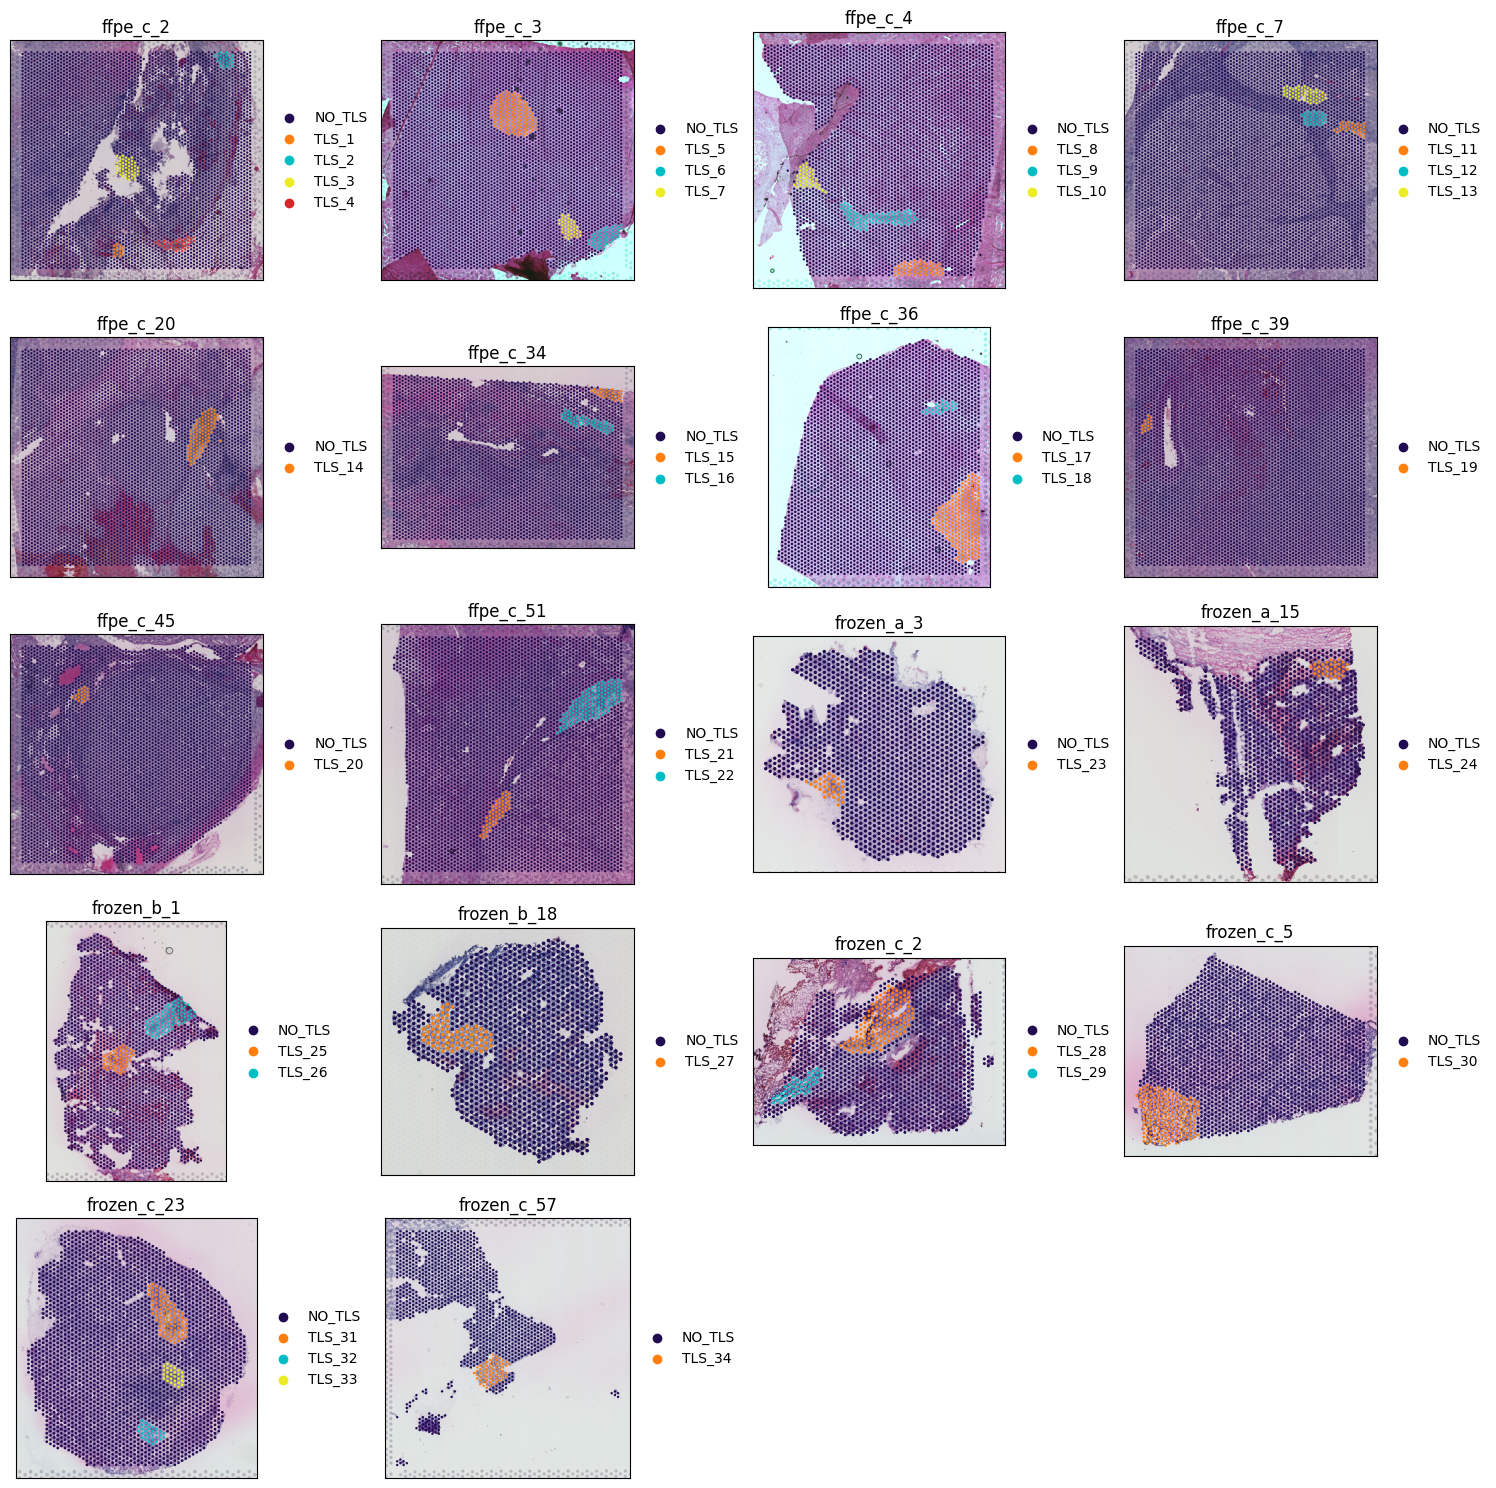

In [5]:
import warnings
warnings.filterwarnings("ignore")
color_list = ['#210c52', '#ff7f0e', '#00bfc4', '#ebec23', '#d62728']
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 15))
axes = axes.flatten()
for i, (sample_id, adata) in enumerate(zip(sample_ids, adata_list)):
    tls_group_num = len(np.unique(adata.obs['tls_group']))
    sc.pl.spatial(adata, color='tls_group', palette=color_list[:tls_group_num], ax=axes[i], show=False, title=sample_id)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
axes[18].axis('off')
axes[19].axis('off')
fig.tight_layout()
fig.show()

### Set up QueST trainer

In [6]:
trainer = QueSTTrainer(dataset=dataset, data_path=data_path, sample_ids=sample_ids, adata_list=adata_list,
                       query_niches=None, query_sample_id=None, 
                       model_path=model_path,
                       embedding_folder=embedding_folder,
                       epochs=20, save_model=True, hvg=4000, min_count=0, normalize=True, seed=2024)

INFO:quest.trainer:Processing arguments, time: 2025/11/01 16:59:58
INFO:quest.trainer:QueST Trainer initialized, loading data, time: 2025/11/01 16:59:58
INFO:quest.trainer:Data loaded with 18 adata objects, time: 2025/11/01 16:59:58


In [7]:
trainer.train()

INFO:quest.trainer:adata ffpe_c_2 has existing graph
INFO:quest.trainer:adata ffpe_c_3 has existing graph
INFO:quest.trainer:adata ffpe_c_4 has existing graph
INFO:quest.trainer:adata ffpe_c_7 has existing graph
INFO:quest.trainer:adata ffpe_c_20 has existing graph
INFO:quest.trainer:adata ffpe_c_34 has existing graph
INFO:quest.trainer:adata ffpe_c_36 has existing graph
INFO:quest.trainer:adata ffpe_c_39 has existing graph
INFO:quest.trainer:adata ffpe_c_45 has existing graph
INFO:quest.trainer:adata ffpe_c_51 has existing graph
INFO:quest.trainer:adata frozen_a_3 has existing graph
INFO:quest.trainer:adata frozen_a_15 has existing graph
INFO:quest.trainer:adata frozen_b_1 has existing graph
INFO:quest.trainer:adata frozen_b_18 has existing graph
INFO:quest.trainer:adata frozen_c_2 has existing graph
INFO:quest.trainer:adata frozen_c_5 has existing graph
INFO:quest.trainer:adata frozen_c_23 has existing graph
INFO:quest.trainer:adata frozen_c_57 has existing graph
INFO:quest.utils:pre

In [8]:
trainer.inference(save_embedding=True, query=False)

INFO:quest.trainer:Loading model, time: 2025/11/01 17:22:55
INFO:quest.trainer:Saving niche embeddings for each sample, time: 2025/11/01 17:23:03
INFO:quest.trainer:Processing ffpe_c_2
INFO:quest.trainer:Processing ffpe_c_3
INFO:quest.trainer:Processing ffpe_c_4
INFO:quest.trainer:Processing ffpe_c_7
INFO:quest.trainer:Processing ffpe_c_20
INFO:quest.trainer:Processing ffpe_c_34
INFO:quest.trainer:Processing ffpe_c_36
INFO:quest.trainer:Processing ffpe_c_39
INFO:quest.trainer:Processing ffpe_c_45
INFO:quest.trainer:Processing ffpe_c_51
INFO:quest.trainer:Processing frozen_a_3
INFO:quest.trainer:Processing frozen_a_15
INFO:quest.trainer:Processing frozen_b_1
INFO:quest.trainer:Processing frozen_b_18
INFO:quest.trainer:Processing frozen_c_2
INFO:quest.trainer:Processing frozen_c_5
INFO:quest.trainer:Processing frozen_c_23
INFO:quest.trainer:Processing frozen_c_57


In [9]:
group_a = ['TLS_14', 'TLS_28', 'TLS_29', 'TLS_31', 'TLS_32', 'TLS_33']
group_b1 = ['TLS_3', 'TLS_5',  'TLS_6',  'TLS_7',  'TLS_8', 
            'TLS_9', 'TLS_11', 'TLS_12', 'TLS_13', 'TLS_17', 
            'TLS_18', 'TLS_19', 'TLS_20', 'TLS_21', 'TLS_22', 
            'TLS_23', 'TLS_24', 'TLS_25', 'TLS_26', 'TLS_27']
group_b2 = ['TLS_1', 'TLS_2', 'TLS_4', 'TLS_10', 'TLS_15', 'TLS_16', 'TLS_30', 'TLS_34']
group_b = group_b1 + group_b2
tls_labels = ['TLS_1', 'TLS_2', 'TLS_3', 'TLS_4', 'TLS_5', 'TLS_6', 'TLS_7', 'TLS_8', 
              'TLS_9', 'TLS_10', 'TLS_11', 'TLS_12', 'TLS_13', 'TLS_14', 'TLS_15', 'TLS_16', 'TLS_17', 
              'TLS_18', 'TLS_19', 'TLS_20', 'TLS_21', 'TLS_22', 'TLS_23', 'TLS_24', 'TLS_25', 'TLS_26', 
              'TLS_27', 'TLS_28', 'TLS_29', 'TLS_30', 'TLS_31', 'TLS_32', 'TLS_33', 'TLS_34']
tls_all_group = {
    'Group A': group_a,
    'Group B1': group_b1,
    'Group B2': group_b2
}

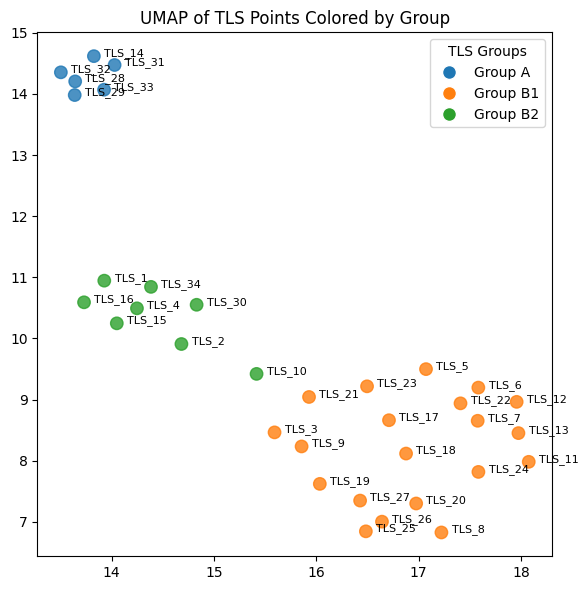

In [10]:
emb_list = [torch.load(f"{embedding_folder}/{sample_id}.pt") for sample_id in sample_ids]
tls_embedding_dict = utils.get_tls_embedding(adata_list, emb_list)
utils.plot_tls_umap(tls_embedding_dict, tls_all_group)